Inspired from Kutz, J. N., Brunton, S. L., Brunton, B. W., & Proctor, J. L. (2016). Dynamic Mode Decomposition. In Dynamic Mode Decomposition. https://doi.org/10.1137/1.9781611974508

In [5]:
using MAT, LinearAlgebra, Plots;gr()

Plots.GRBackend()

In [6]:
pwd()

"C:\\Temp\\DATA\\FLUIDS"

In [7]:
#cd("D:\\Users\\Administrator\\Desktop\\AD\\Research\\DDSE\\CODE\\CH02_FLUIDS");
cd("C:\\Temp\\DATA\\FLUIDS");

In [8]:
matdata = matread(".\\CYLINDER_ALL.mat")

Dict{String,Any} with 10 entries:
  "n"         => 449.0
  "nx"        => 199.0
  "m"         => 199.0
  "UEXTRA"    => [1.01268; 1.01211; … ; 0.899783; 0.90235]
  "ny"        => 449.0
  "VEXTRA"    => [-0.115357; -0.116494; … ; 0.156785; 0.153308]
  "VORTALL"   => [-9.37978e-15 -8.81369e-15 … -9.41491e-15 -9.30876e-15; -9.306…
  "UALL"      => [1.01243 1.01092 … 1.01606 1.01434; 1.01186 1.01034 … 1.01553 …
  "VALL"      => [-0.11537 -0.115353 … -0.114821 -0.115171; -0.116503 -0.116465…
  "VORTEXTRA" => [-8.3202e-15; -8.40734e-15; … ; -0.0316823; -0.0451625]

In [9]:
n=Int64(matdata["n"])

449

In [10]:
m=Int64(matdata["m"])

199

In [11]:
Y=matdata["VORTALL"]

89351×151 Array{Float64,2}:
 -9.37978e-15  -8.81369e-15  -8.98807e-15  …  -9.41491e-15  -9.30876e-15
 -9.30657e-15  -8.89068e-15  -8.94398e-15     -9.56562e-15  -9.35889e-15
 -9.42567e-15  -8.94825e-15  -9.03783e-15     -9.53402e-15  -9.57157e-15
 -9.57959e-15  -9.05351e-15  -9.2128e-15      -9.69805e-15  -9.73142e-15
 -9.69828e-15  -9.14165e-15  -9.44906e-15     -9.73998e-15  -9.83227e-15
 -9.87617e-15  -9.36489e-15  -9.66449e-15  …  -9.83069e-15  -9.95173e-15
 -1.01362e-14  -9.54897e-15  -9.77338e-15     -9.92928e-15  -1.01062e-14
 -1.01996e-14  -9.61967e-15  -1.0021e-14      -1.00161e-14  -1.02688e-14
 -1.02105e-14  -1.00158e-14  -1.02248e-14     -1.0251e-14   -1.06375e-14
 -1.02604e-14  -1.0253e-14   -1.04281e-14     -1.06053e-14  -1.08154e-14
 -1.0534e-14   -1.04743e-14  -1.0811e-14   …  -1.06298e-14  -1.10028e-14
 -1.06827e-14  -1.04316e-14  -1.11066e-14     -1.07253e-14  -1.12029e-14
 -1.12405e-14  -1.05765e-14  -1.13993e-14     -1.07825e-14  -1.10238e-14
  ⋮                    

In [12]:
x = range(-1,8,length=n);collect(x)

449-element Array{Float64,1}:
 -1.0
 -0.9799107142857143
 -0.9598214285714286
 -0.9397321428571429
 -0.9196428571428571
 -0.8995535714285714
 -0.8794642857142857
 -0.859375
 -0.8392857142857143
 -0.8191964285714286
 -0.7991071428571429
 -0.7790178571428571
 -0.7589285714285714
  ⋮
  7.779017857142857
  7.799107142857143
  7.819196428571429
  7.839285714285714
  7.859375
  7.879464285714286
  7.899553571428571
  7.919642857142857
  7.939732142857143
  7.959821428571429
  7.979910714285714
  8.0

In [13]:
y = range(-2,2,length=m);collect(y)

199-element Array{Float64,1}:
 -2.0
 -1.97979797979798
 -1.9595959595959596
 -1.9393939393939394
 -1.9191919191919191
 -1.898989898989899
 -1.878787878787879
 -1.8585858585858586
 -1.8383838383838385
 -1.8181818181818181
 -1.797979797979798
 -1.7777777777777777
 -1.7575757575757576
  ⋮
  1.7777777777777777
  1.797979797979798
  1.8181818181818181
  1.8383838383838385
  1.8585858585858586
  1.878787878787879
  1.898989898989899
  1.9191919191919191
  1.9393939393939394
  1.9595959595959596
  1.97979797979798
  2.0

In [14]:
Y100=reshape(Y[:,100],m,n)

199×449 Array{Float64,2}:
 -3.96483e-15  -4.25751e-15  -4.41549e-15  …   0.380607      0.377886
 -3.90227e-15  -4.29252e-15  -4.44836e-15      0.398482      0.396756
 -3.76327e-15  -4.14088e-15  -4.30397e-15      0.414686      0.414081
 -3.85766e-15  -4.13444e-15  -4.28173e-15      0.429041      0.429566
 -3.85128e-15  -4.15219e-15  -4.29201e-15      0.441443      0.443269
 -4.04961e-15  -4.32147e-15  -4.52266e-15  …   0.451866      0.454978
 -4.20511e-15  -4.41813e-15  -4.48509e-15      0.460341      0.464849
 -4.12363e-15  -4.43879e-15  -4.69791e-15      0.466961      0.472813
 -4.28103e-15  -4.46808e-15  -4.79342e-15      0.471872      0.479113
 -4.30275e-15  -4.48827e-15  -4.81097e-15      0.475267      0.483817
 -4.32738e-15  -4.55601e-15  -4.59733e-15  …   0.477378      0.487216
 -4.35916e-15  -4.45548e-15  -4.52757e-15      0.478461      0.489492
 -4.3724e-15   -4.4227e-15   -4.40105e-15      0.47879       0.490945
  ⋮                                        ⋱                
  7

In [15]:
my_cg=cgrad([:lightblue,:blue, :black,  :tomato, :yellow]);

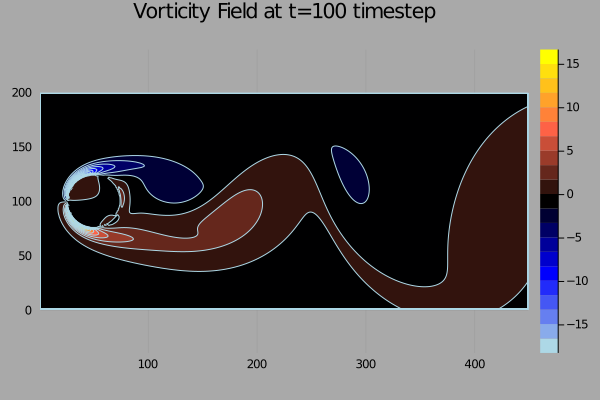

In [16]:
#diverging_bkr_55_10_c35_n256
contour(reshape(Y[:,125],m,n),levels=20,fill=true,axis=false,aspectratio=1,bg=:darkgray,title="Vorticity Field at t=100 timestep",c=my_cg)

In [17]:
# 1D Animation over the first second
anim=Animation()
anim = @animate for t in 1:151
    contour(reshape(Y[:,t],m,
            n), levels=20,clim=(-15,15),fill=true,axis=false,aspectratio=1,background_color=:darkgray, title="Vorticity Field",c=my_cg)
    Plots.frame(anim)
end
gif(anim, "img/vorticity_fps15.gif", fps = 15)

C:\Temp\DATA\FLUIDS\img\vorticity_fps15.gif: No such file or directory


LoadError: failed process: Process(`'D:\adeldicq\.julia\artifacts\7350a6401f1c0d38cc3518193083bc4f83adfe99\bin\ffmpeg.exe' -v 16 -framerate 15 -i 'D:\adeldicq\AppData\Local\Temp\jl_k2R75e/%06d.png' -i 'D:\adeldicq\AppData\Local\Temp\jl_k2R75e/palette.bmp' -lavfi paletteuse=dither=sierra2_4a -loop 0 -y 'C:\Temp\DATA\FLUIDS\img\vorticity_fps15.gif'`, ProcessExited(1)) [1]


In [18]:
#= using Winston, ColorSchemes
cmpleonardo = ColorSchemes.leonardo.colors
Winston.colormap(cmpleonardo)
Winston.imagesc(Y30) =#

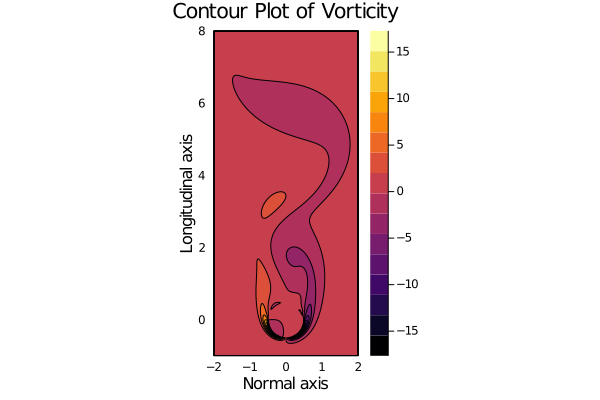

In [19]:
# 2D Contour Plot of the data matrix Y
contour(y,x,Y[:,100],aspectratio=1, fill=true, xlim=(-2,2))
xlabel!("Normal axis")
ylabel!("Longitudinal axis")
title!("Contour Plot of Vorticity")

In [20]:
X=Y[:,1:end-1];X2=Y[:,2:end];

In [21]:
SVD = svd(X)

LinearAlgebra.SVD{Float64,Float64,Array{Float64,2}}
U factor:
89351×150 Array{Float64,2}:
  2.35745e-17   8.34907e-17  -5.43118e-17  …   2.60425e-10  -4.6617e-10
 -5.9003e-17    1.05347e-16  -1.59702e-17     -2.15206e-10   4.31132e-11
 -5.70012e-17   2.38486e-17   3.67808e-17      3.99215e-11  -2.02895e-10
  3.24818e-18  -3.43713e-17  -1.26752e-16      3.58305e-11  -1.12843e-10
  2.65113e-17  -2.88818e-17  -1.38926e-17     -7.96798e-11   3.01627e-10
 -5.37733e-17  -3.15915e-17   3.03913e-17  …   3.32214e-10  -1.04056e-10
 -2.09106e-17  -2.27048e-17  -6.10512e-17     -1.08152e-10   1.13684e-10
  1.00225e-18  -1.19421e-17  -1.14158e-16     -6.14689e-11   1.78222e-10
  5.39347e-18   6.51382e-17  -8.31865e-17      3.45901e-11  -3.48605e-11
 -7.59129e-18   5.77291e-17  -1.042e-16       -7.61803e-12  -4.74647e-11
  3.1279e-17    9.4189e-17   -9.4894e-17   …   6.52303e-11   1.78358e-10
 -3.33121e-17  -3.20552e-17   2.38773e-17      3.24612e-11  -8.77474e-11
 -4.21138e-17  -2.07513e-17   2.034

In [22]:
#  Compute DMD (Phi are eigenvectors)
r = 21  # truncate at 21 modes
U = SVD.U[:,1:r]

89351×21 Array{Float64,2}:
  2.35745e-17   8.34907e-17  -5.43118e-17  …  -9.61097e-14   4.35808e-14
 -5.9003e-17    1.05347e-16  -1.59702e-17     -1.44257e-14   1.3003e-14
 -5.70012e-17   2.38486e-17   3.67808e-17      1.65712e-15   8.54708e-15
  3.24818e-18  -3.43713e-17  -1.26752e-16     -1.11231e-14   4.95556e-15
  2.65113e-17  -2.88818e-17  -1.38926e-17      1.40298e-16  -7.55721e-15
 -5.37733e-17  -3.15915e-17   3.03913e-17  …  -2.83615e-14  -8.15054e-15
 -2.09106e-17  -2.27048e-17  -6.10512e-17     -2.01888e-16  -3.96257e-14
  1.00225e-18  -1.19421e-17  -1.14158e-16      6.14086e-15  -5.61184e-15
  5.39347e-18   6.51382e-17  -8.31865e-17      2.33314e-14   1.79672e-16
 -7.59129e-18   5.77291e-17  -1.042e-16       -4.9365e-15   -2.59579e-14
  3.1279e-17    9.4189e-17   -9.4894e-17   …  -8.13181e-15  -1.4258e-15
 -3.33121e-17  -3.20552e-17   2.38773e-17      1.48924e-14  -1.48758e-15
 -4.21138e-17  -2.07513e-17   2.03468e-18      5.93638e-15  -1.21781e-14
  ⋮                       

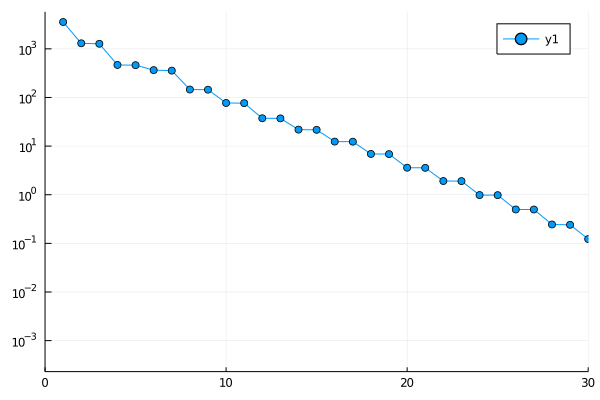

In [23]:
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics) The very good decay shows the existence of a low rank subspace=#
S = diagm(SVD.S[1:r]);
plot(SVD.S, yaxis=:log, xlim=(0,30),shape =:circle)

In [24]:
Vt = SVD.Vt[1:r,:]

21×150 Array{Float64,2}:
  0.0817218    0.0818297   0.0818917   …   0.0812814   0.0814135
 -0.0451971   -0.0670243  -0.0863194       0.0274308   0.00488999
  0.107366     0.0956998   0.0796626       0.112711    0.116218
  0.008966     0.055033    0.0912369      -0.109708   -0.0850059
 -0.117129    -0.104786   -0.0740965      -0.0396982  -0.0793708
  0.115256     0.113247    0.0683129   …  -0.0677451  -0.00218471
  0.0389355   -0.0337157  -0.0923139       0.0937717   0.12037
 -0.0382956   -0.102336   -0.0989063       0.0933621   0.114969
 -0.109247    -0.0429758   0.0503651       0.06536    -0.0250297
  0.114178     0.0734367  -0.0369331      -0.111941   -0.0840567
 -0.026405     0.0810395   0.104681    …   0.0309354  -0.0859379
  0.116209     0.0579501  -0.0773425      -0.0659211  -0.113112
 -0.0305215    0.0983492   0.0885788       0.0931529  -0.0407889
  0.117036     0.0167675  -0.114028       -0.0111653  -0.114816
 -0.0115926    0.116251    0.0343697       0.112152   -0.00761831
  0

In [25]:
Ã = U'*X2*Vt'*inv(S)

21×21 Array{Float64,2}:
  0.999986     -0.000897748  -0.000133548  …   0.00111725    0.000230894
  0.000910772   0.977843     -0.209509        -8.17778e-6    0.000192505
  0.000254427   0.203275      0.979009         6.71172e-5   -1.47374e-5
 -0.000499744  -3.43021e-5   -0.00267733      -0.00116229   -0.00285656
  0.000272426  -0.00131712    0.000402129      0.00918791    0.00448244
 -0.000418776   0.00278602   -0.00168255   …  -0.000128418  -7.60964e-5
  0.000530142  -0.00232436    0.00208709      -0.000168757  -0.000429142
  0.000341933  -6.17367e-5    0.00137902       0.000833096  -0.00358545
  2.61402e-5   -0.000323676   9.11222e-5      -0.00845384   -0.00788661
 -0.000154603   9.34358e-5   -0.000609233      0.000100638  -0.000945113
 -0.000165279  -0.000122627  -0.000673255  …  -0.00046013    0.000502896
 -0.000103975   7.29476e-5   -0.000409813      0.00981972   -0.00231024
 -8.2922e-5    -3.71028e-5   -0.000334741     -0.00241368    0.00891914
 -6.59358e-5    4.12177e-5   -0.000

In [26]:
F = eigen(Ã)
Φ = X2*Vt'*inv(S)*F.vectors

89351×21 Array{Complex{Float64},2}:
  2.91646e-17+8.85125e-17im   2.91646e-17-8.85125e-17im  …   1.7365e-17+0.0im
 -4.20173e-18+1.13e-16im     -4.20173e-18-1.13e-16im        1.75079e-17+0.0im
   7.7204e-18+1.06692e-16im    7.7204e-18-1.06692e-16im       1.763e-17+0.0im
  2.59786e-17+8.8411e-17im    2.59786e-17-8.8411e-17im      1.76656e-17+0.0im
    1.688e-17+1.04467e-16im     1.688e-17-1.04467e-16im     1.77846e-17+0.0im
 -1.18982e-17+1.14877e-16im  -1.18982e-17-1.14877e-16im  …  1.79706e-17+0.0im
 -7.53051e-18+1.50394e-16im  -7.53051e-18-1.50394e-16im     1.82263e-17+0.0im
 -2.15988e-17+1.7423e-16im   -2.15988e-17-1.7423e-16im      1.83694e-17+0.0im
  3.90372e-18+1.49406e-16im   3.90372e-18-1.49406e-16im     1.86352e-17+0.0im
 -4.01809e-18+1.53573e-16im  -4.01809e-18-1.53573e-16im     1.90566e-17+0.0im
 -1.04027e-17+1.34434e-16im  -1.04027e-17-1.34434e-16im  …  1.93611e-17+0.0im
    6.163e-18+1.23193e-16im     6.163e-18-1.23193e-16im     1.94664e-17+0.0im
  1.68357e-17+7.84701e-17im 

In [27]:
a=1. +2. *im

1.0 + 2.0im

In [28]:
imag(a)

2.0

In [29]:
Φ[:,1:2]

89351×2 Array{Complex{Float64},2}:
  2.91646e-17+8.85125e-17im   2.91646e-17-8.85125e-17im
 -4.20173e-18+1.13e-16im     -4.20173e-18-1.13e-16im
   7.7204e-18+1.06692e-16im    7.7204e-18-1.06692e-16im
  2.59786e-17+8.8411e-17im    2.59786e-17-8.8411e-17im
    1.688e-17+1.04467e-16im     1.688e-17-1.04467e-16im
 -1.18982e-17+1.14877e-16im  -1.18982e-17-1.14877e-16im
 -7.53051e-18+1.50394e-16im  -7.53051e-18-1.50394e-16im
 -2.15988e-17+1.7423e-16im   -2.15988e-17-1.7423e-16im
  3.90372e-18+1.49406e-16im   3.90372e-18-1.49406e-16im
 -4.01809e-18+1.53573e-16im  -4.01809e-18-1.53573e-16im
 -1.04027e-17+1.34434e-16im  -1.04027e-17-1.34434e-16im
    6.163e-18+1.23193e-16im     6.163e-18-1.23193e-16im
  1.68357e-17+7.84701e-17im   1.68357e-17-7.84701e-17im
             ⋮               
  -0.00201884-0.000237741im   -0.00201884+0.000237741im
  -0.00180193-0.000545018im   -0.00180193+0.000545018im
  -0.00154626-0.000781958im   -0.00154626+0.000781958im
  -0.00127314-0.00095633im    -0.00127314+0.

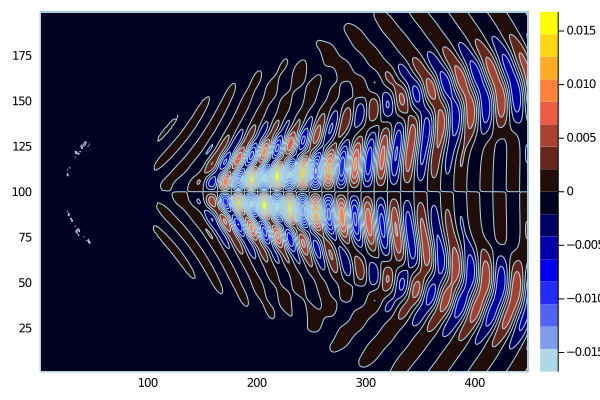

In [30]:
contour(reshape(real(Φ[:,1]),m,n), fill=true,c=my_cg)

In [ ]:
YY=real(Φ[:,1:20])
contour(contour(reshape(YY[:,1],m,n),c=my_cg), contour(reshape(YY[:,20],m,n),c=my_cg), layout=(2,1), fill=true,c=my_cg)